# Overlaying Two Maps

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/AIA_HMI_composite.html

This example demonstrates how to draw contours of one map on top of another
to compare features.

In [ ]:
import matplotlib.colors
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
from sunpy.map import Map

We start with the sample data. HMI shows the line-of-sight magnetic field at
the photosphere while AIA 171 images show the resulting magnetic fields
filled with hot plasma above, in the corona. We want to see what coronal
features overlap with regions of strong line-of-sight magnetic fields.

In [ ]:
aia_map = Map(sunpy.data.sample.AIA_171_IMAGE)
hmi_map = Map(sunpy.data.sample.HMI_LOS_IMAGE)

bottom_left = [0, 0] * u.arcsec
top_right = [800, 800] * u.arcsec
aia_smap = aia_map.submap(SkyCoord(*bottom_left,
                                   frame=aia_map.coordinate_frame),
                          top_right=SkyCoord(*top_right,
                                             frame=aia_map.coordinate_frame))
hmi_smap = hmi_map.submap(SkyCoord(*bottom_left,
                                   frame=hmi_map.coordinate_frame),
                          top_right=SkyCoord(*top_right,
                                             frame=hmi_map.coordinate_frame))

Let's set the contours of the HMI map from a few hundred to a thousand
Gauss, which is the typical field strength associated with umbral regions of
pores and sunspots.

In [ ]:
levels = [-1000, -500, -250, 250, 500, 1000] * u.G

Now let's look at the result. Notice that we can see the coronal structures
present on the AIA image and how they correspond to the line of sight
magnetic field.

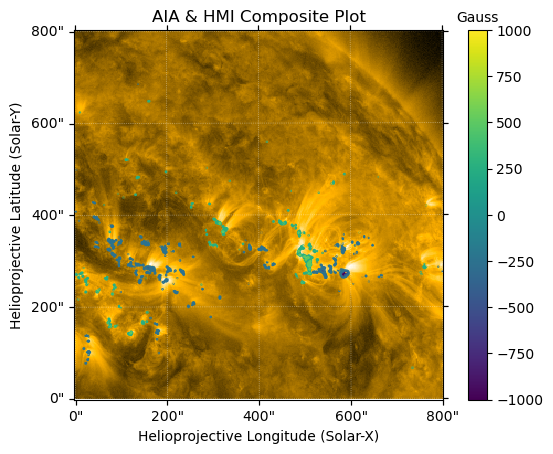

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_smap)
aia_smap.plot(axes=ax)
hmi_smap.draw_contours(axes=ax, levels=levels, cmap="viridis")
norm = matplotlib.colors.Normalize(vmin=-1000, vmax=1000)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
cbar.ax.set_title("Gauss", fontsize=10)
ax.set_title("AIA & HMI Composite Plot")

plt.show()